In [181]:
import numpy as np
import pandas as pd
import json
import os

full = pd.read_csv("Full/full_3.csv", index_col=0)
full_err_df = pd.read_csv("Full/full_err.csv", index_col=0)
full_err_df['accumulated_error'] = np.abs(full_err_df['accumulated_error'])


/tmp/ipykernel_965433/3844947026.py:6: DtypeWarning: Columns (58,76,78,100,153) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_3.csv", index_col=0)


In [182]:
import joblib

def load_model(filename):
    try:
        # Save the model to the specified file
        model = joblib.load(filename)
        print("Model loaded successfully")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")


In [187]:
model_poly_final = load_model("Models/Precision/model_poly_final.joblib")
model_dt_final = load_model("Models/Precision/model_dt_final.joblib")
model_huber_final = load_model("Models/Precision/model_huber_final.joblib")
model_gb_final = load_model("Models/Precision/model_gb_final.joblib")
model_svr_final = load_model("Models/Precision/model_svr_final.joblib")


Model loaded successfully
Model loaded successfully
Model loaded successfully
Model loaded successfully
Model loaded successfully


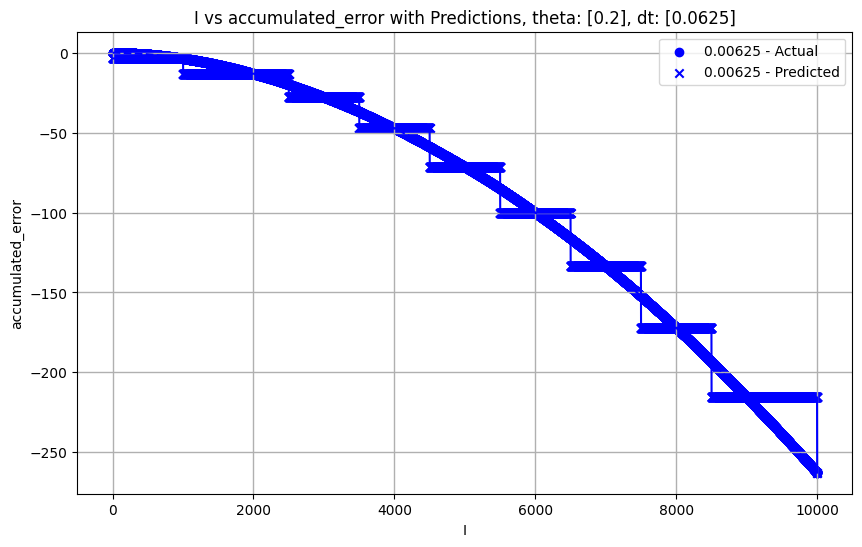

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_err_df.copy()
model = model_dt_final

# src = 'theta'
src = 'I'
target = 'accumulated_error'

# Define the filter criteria
filter_criteria = {
    'theta': [0.8],
    'N': [10000],
    # 'I': [10000],
    'dt': [0.00625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Add predictions to the filtered dataset
df['predicted_accumulated_error'] = model.predict(df[['N', 'theta', 'dt', 'I']])

# Group by a specific feature
grouped = df.groupby('dt')

# Plot X vs y for each group
colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    # Plot actual values
    ax.scatter(group_data[src], group_data['accumulated_error'], color=color, label=f'{group_name} - Actual')
    ax.plot(group_data[src], group_data['accumulated_error'], linestyle='--', color=color)  # Dashed line for actual
    
    # Plot predicted values
    ax.scatter(group_data[src], group_data['predicted_accumulated_error'], color=color, marker='x', label=f'{group_name} - Predicted')
    ax.plot(group_data[src], group_data['predicted_accumulated_error'], linestyle='-', color=color)  # Solid line for predicted

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale("asinh")         # Logarithmic scale for y-axis

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel('accumulated_error')
ax.set_title(f'{src} vs accumulated_error with Predictions, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
# ax.set_xlim(df['I'].min() - 1, df['I'].max() + 1)
# ax.set_ylim(df['accumulated_error'].min() * 0.8, df['accumulated_error'].max() * 1.2)

plt.show()

Model loaded successfully


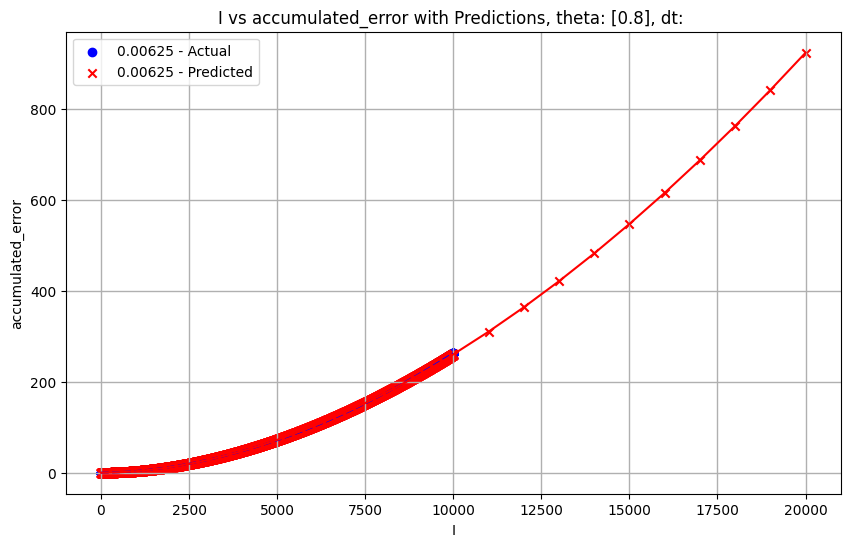

In [624]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define named functions for the transformations
def log10_transform(x):
    return np.log10(x)

def inverse_log10_transform(x):
    return np.power(10, x)

model_poly_final_test = load_model("Models/Precision/model_poly_final_test.joblib")


df = full_err_df.copy()
model = model_poly_final_test

# src = 'theta'
src = 'I'
target = 'accumulated_error'

# Define the filter criteria
filter_criteria = {
    'theta': [0.8],
    'N': [10000],
    # 'I': [10000],
    'dt': [0.00625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Generate extended range of I values
max_I = df['I'].max()
new_I_values = np.arange(max_I + 1000, max_I + 11000, 1000)  # Generate I values in steps of 1000
extended_df = pd.DataFrame({
    'N': filter_criteria['N'][0],
    'theta': filter_criteria['theta'][0],
    'dt': filter_criteria['dt'][0],
    'I': new_I_values
})

# Combine original and extended datasets
df = pd.concat([df, extended_df], ignore_index=True)

# Add predictions to the dataset
# df['predicted_accumulated_error'] = model.predict(df[['dt','I']])
df['predicted_accumulated_error'] = model.predict(df[['N', 'theta', 'dt', 'I']])

# Group by a specific feature
grouped = df.groupby('dt')

# Plot X vs y for each group
colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    # Plot actual values
    actual_data = group_data[group_data[target].notnull()]  # Only include rows with actual values
    ax.scatter(actual_data[src], actual_data[target], color=color, label=f'{group_name} - Actual')
    ax.plot(actual_data[src], actual_data[target], linestyle='--', color=color)  # Dashed line for actual
    
    # Plot predicted values
    ax.scatter(group_data[src], group_data['predicted_accumulated_error'], color= 'red', marker='x', label=f'{group_name} - Predicted')
    ax.plot(group_data[src], group_data['predicted_accumulated_error'], linestyle='-', color= 'red')  # Solid line for predicted

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)


# ax.set_yscale('log')         # Logarithmic scale for y-axis linear', 'log', 'symlog', 'asinh', 'logit',
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel('accumulated_error')
ax.set_title(f'{src} vs accumulated_error with Predictions, theta: {filter_criteria["theta"]}, dt: ') #{filter_criteria["dt"]}
ax.legend()

# # Set x and y limits to cover the range of points
# ax.set_xlim(df['I'].min() - 1, df['I'].max() + 1)
# ax.set_ylim(df[target].min() * 0.8, df['predicted_accumulated_error'].max() * 1.2)

plt.show()
